### **import libraries**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,log_loss
from sklearn.decomposition import IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from xgboost  import XGBClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# **Predefined methods**

for clean code

In [ ]:
def plot_box(df,columns_names, size=1):
    """
    This method will be called to plot a box plot for each column to detect the outliers.
    df: dataframe
    columns_names: numeric columns to plot (list)
    size: number of plot box figures (int)
    """
    plt.figure(figsize = [10,20])
    for i in range(1,size + 1):
        plt.subplot(5,3,i)
        sns.boxplot(data = df[columns_names].iloc[:,i-1], color= '#9546A2')
        plt.title(columns_names[i-1], fontsize = 20)
    plt.savefig('Boxpolt_aft_outliers.png')

In [ ]:
def bar_chart(df,columns_names):
  '''
  This method will be called to plot a bar chart for each column 
  df: dataframe
  columns_names: categorical columns to plot (list)
  '''
  for key in df[columns_names].keys():
    fig = plt.figure(figsize = (10, 5))
    air=df[key]
    airb=air.value_counts()
    airb.plot.bar(x=key,y=airb,rot=0)
    plt.show()


In [ ]:
def clean_outliers(df,key,mean,median,mode,min,max,method=0):
  '''
  Method for clean outliers in given data

  arguments:
  df: dataframe that contain the data (dataframe)
  columns_names: numrical columns to clean (list)

  method: which method to use:
  0: drop outliers
  1: replace outliers with mean
  2: replace outliers with mode
  3: replace outliers with median
  4: replace outliers with min(for lower outliers ) max(for upper outliers)
  deafult=0
  (int)

  return dataframe after cleaning outliers
  '''
    
  if method==1:
    df.loc[(df[key] < min), key] = np.nan
    df.loc[(df[key] > max), key]= np.nan
    df.fillna(mean,inplace=True)
  elif method==2:
    df.loc[(df[key] < min), key] = np.nan
    df.loc[(df[key] > max), key]= np.nan
    df.fillna(mode,inplace=True)
  elif method==3:
    df.loc[(df[key] < min), key] = np.nan
    df.loc[(df[key] > max), key]= np.nan
    df.fillna(median,inplace=True)

  elif method==4:
    df.loc[(df[key] < min), key] = np.nan
    df.fillna(min,inplace=True)
    df.loc[(df[key] > max), key]= np.nan
    df.fillna(max,inplace=True)
  else:
    df.loc[(df[key] < min), key] = np.nan
    df.loc[(df[key] > max), key]= np.nan
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)

    
  return df

In [ ]:
def data_preparation(df,numric_colums,cat_columns,tf_columns,scaler,test=False):
  '''
  Method for prepare the data for the  the ML model

  arguments:
  df: dataframe that contain the data  (dataframe)
  numric_colums: numrical columns to prepare (list)
  cat_columns: categorical columns to prepare (list)
  tf_columns:  true false columns to prepare (list)
  scaler: scaler used for scaling ()
  test: true for test data preparation False for train data preparation default False  (boolean)

  return dataframe prepared for ML model
  '''
  df=pd.get_dummies(df,cat_columns)#convert categorical data to 01
  df[tf_columns]=df[tf_columns].astype(int)#convert True false to 1 0
  if(test==False):
    df[numric_colums]=scaler.fit_transform(df[numric_colums])
    
  else:
    df[numric_colums]=scaler.transform(df[numric_colums])#scaling the data
  
  return df

  


In [ ]:
def get_labels(df,label_colum):
  '''
  Method for convert our label to  
  0:unsatisfied
  1:neutral
  2:satisfied
  3:very satisfied

  arguments:
  df: dataframe that contain the labels to convert  (dataframe)
  label_colum: the name of label colum    (str)

  return the new labels
  '''
  label=pd.DataFrame() 
  temp_arr=np.zeros(len(df[label_colum]))
  i=0
  for item in df[label_colum]:
    if(item<60):
      temp_arr[i]=0
    elif (item<75):
      temp_arr[i]=1
    elif (item<83):
      temp_arr[i]=2
    else:
      temp_arr[i]=3
    i+=1
  label[label_colum]=temp_arr.tolist()
  return label

In [ ]:
def get_true_label(y_pred):
  '''
  Method for convert model predictions from number to the real label

  arguments:
  y_pred: predtions of out model (ndarray)

  return list with name of the labels

  '''
  true_label=[]
  for i in range(len(y_pred)):
    if y_pred[i]==0:
      true_label.append('unsatisfied')
    elif y_pred[i]==1:
      true_label.append('neutral')
    elif y_pred[i]==2:
      true_label.append('satisfied')
    else:
      true_label.append('very satisfied')
  return true_label



# **Read data**

In [ ]:
airbnb=pd.read_csv('airbnb.csv')

split the data to hide the test data

In [ ]:
airbnb_train,airbnb_test=train_test_split(airbnb,test_size=0.2, random_state=42)


reset index to avoid problems

In [ ]:
airbnb_train.reset_index(drop=True,inplace=True)
airbnb_test.reset_index(drop=True,inplace=True)

Split colums

In [ ]:
numeric_columns=['Price','Person Capacity','Cleanliness Rating','Bedrooms','City Center (km)',
                      'Metro Distance (km)','Attraction Index','Normalised Attraction Index','Restraunt Index','Normalised Restraunt Index']
cat_columns=['City','Day','Room Type']
tf_columns=['Shared Room','Private Room','Superhost','Multiple Rooms','Business']

bar_columns=['City','Day','Room Type','Shared Room','Private Room','Superhost','Multiple Rooms','Business']

# **Data exploration**

In [ ]:
airbnb_train.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Lisbon,281.425891,Weekday,Entire home/apt,False,False,4.0,True,1,0,10.0,97.0,2,6.135290,0.798435,56.758745,1.873849,129.095646,5.773639
1,Athens,168.021934,Weekend,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,1,1.296308,0.169069,284.390524,10.715192,319.090648,4.765280
2,Lisbon,549.484053,Weekend,Entire home/apt,False,False,6.0,True,0,1,10.0,99.0,3,1.210753,0.605576,176.420293,5.818918,563.872050,31.691100
3,Lisbon,312.382739,Weekday,Entire home/apt,False,False,3.0,False,0,0,10.0,97.0,1,1.775705,1.085998,132.341748,4.369168,396.225012,17.720661
4,Budapest,128.307562,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,98.0,1,1.190785,0.100129,191.691347,11.431456,475.451947,36.002684


In [ ]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33371 entries, 0 to 33370
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         33371 non-null  object 
 1   Price                        33371 non-null  float64
 2   Day                          33371 non-null  object 
 3   Room Type                    33371 non-null  object 
 4   Shared Room                  33371 non-null  bool   
 5   Private Room                 33371 non-null  bool   
 6   Person Capacity              33371 non-null  float64
 7   Superhost                    33371 non-null  bool   
 8   Multiple Rooms               33371 non-null  int64  
 9   Business                     33371 non-null  int64  
 10  Cleanliness Rating           33371 non-null  float64
 11  Guest Satisfaction           33371 non-null  float64
 12  Bedrooms                     33371 non-null  int64  
 13  City Center (km)

In [ ]:
airbnb_train.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000
mean,260.344707,3.235474,0.296994,0.340086,9.442330,93.125408,1.164484,2.678148,0.602441,294.453497,11.753630,627.818617,25.635793
std,269.099632,1.299681,0.456941,0.473745,0.886751,8.110143,0.639995,1.992181,0.708827,237.119647,8.396934,520.271111,18.494135
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.003935,15.152201,0.926301,19.576924,0.592757
25%,144.529523,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.271983,0.236249,125.336365,5.550312,212.218690,11.207702
50%,204.110327,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.254469,0.389910,229.832914,9.999169,520.355027,21.913245
75%,297.609977,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.593944,0.676945,395.148870,15.496135,861.532619,36.957540
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


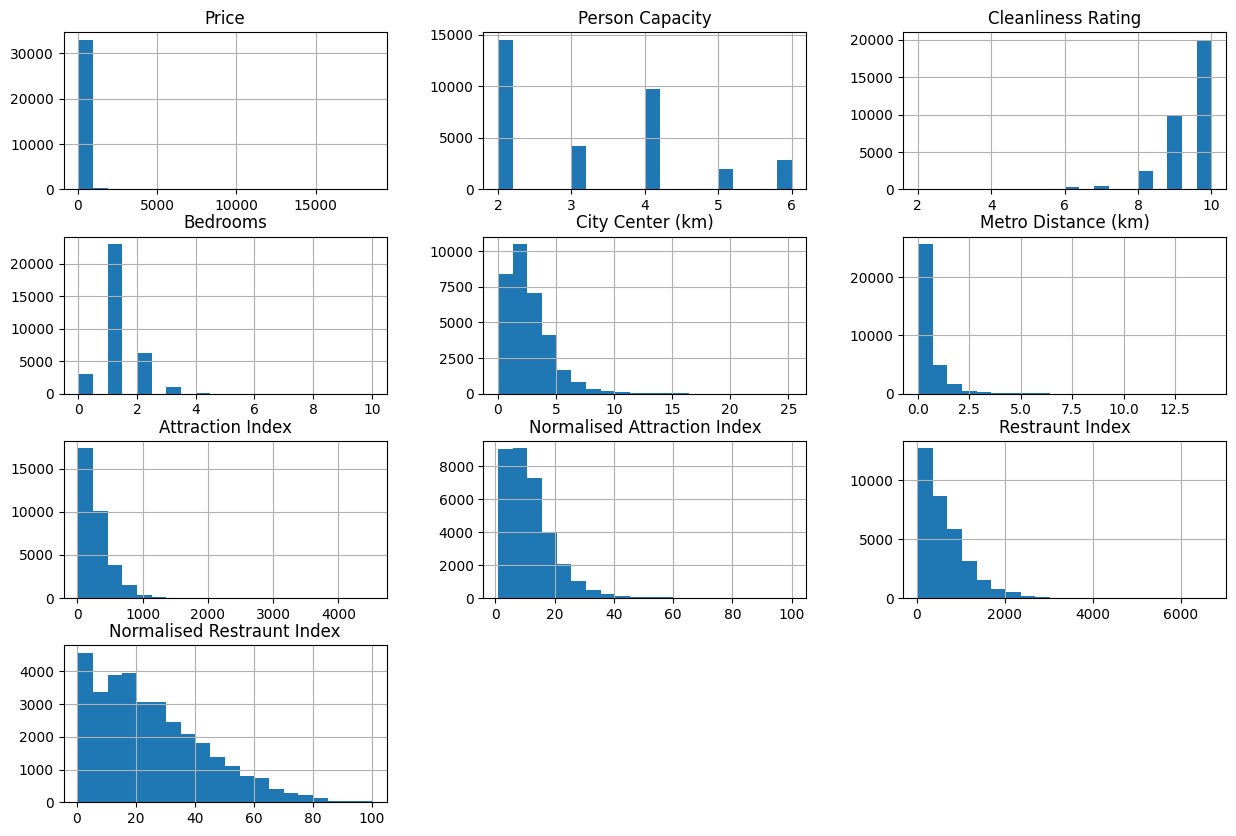

In [ ]:
airbnb_train[numeric_columns].hist(bins=20, figsize=(15,10))
plt.show()

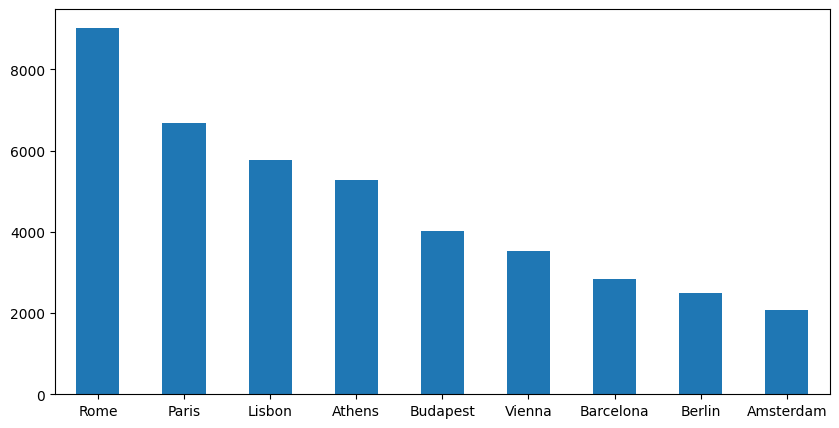

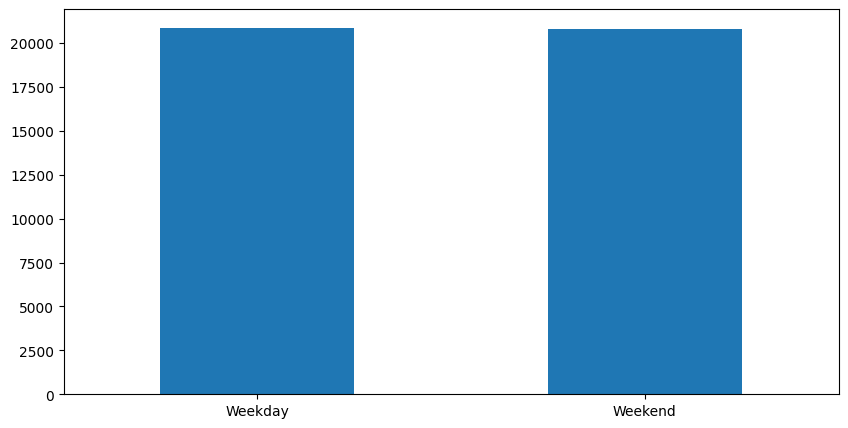

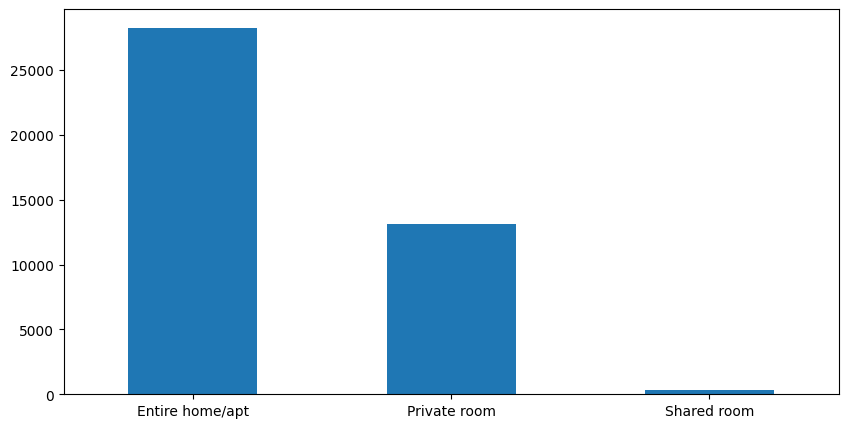

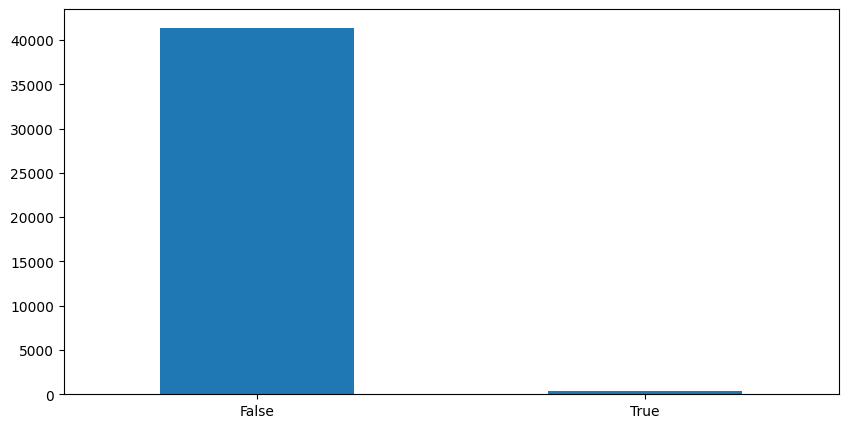

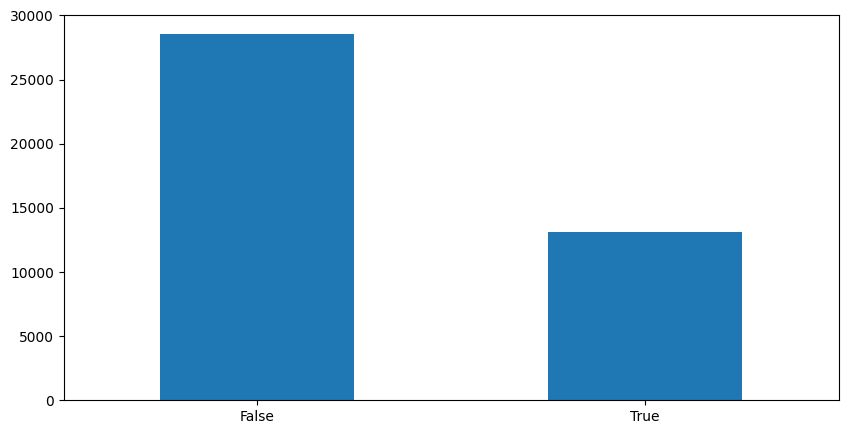

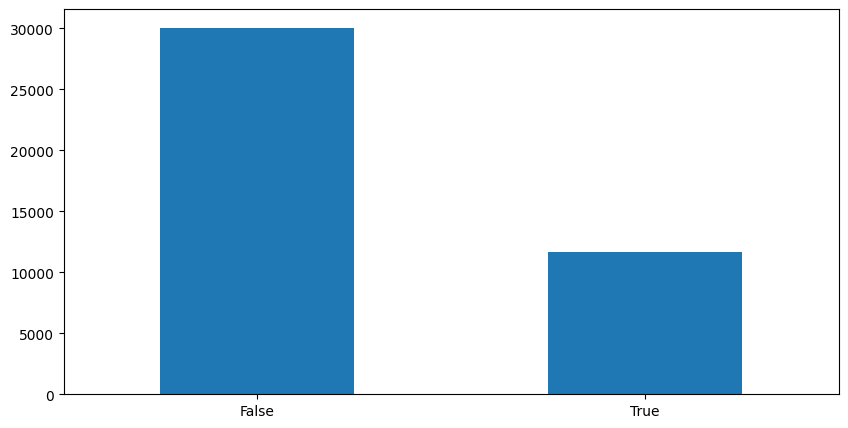

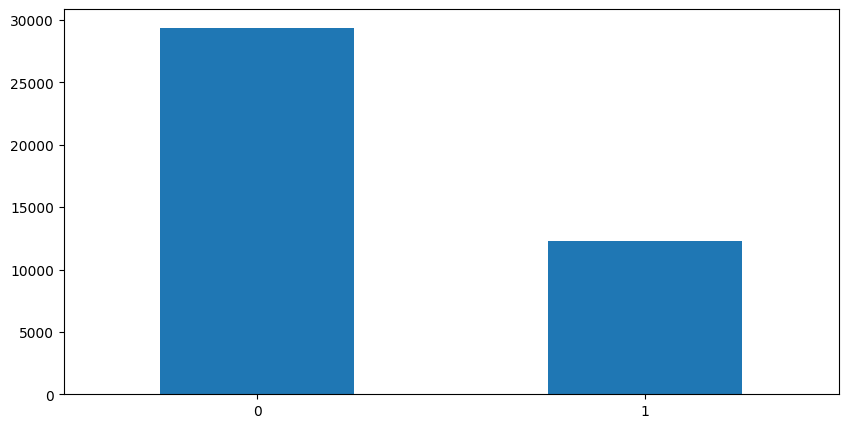

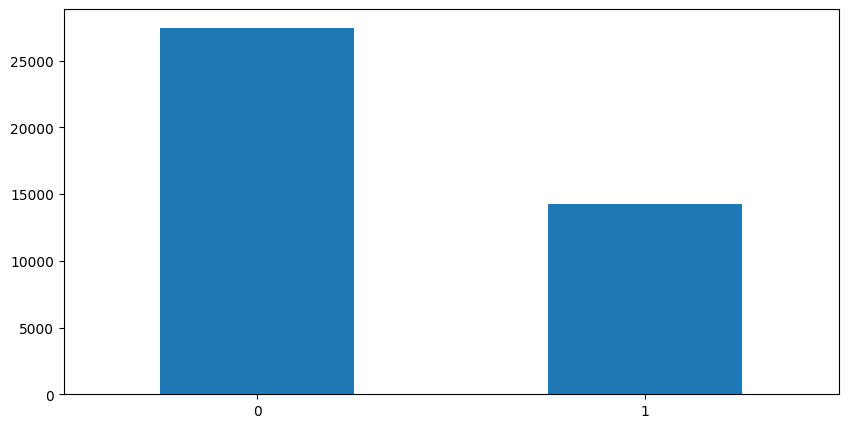

In [ ]:

bar_chart(airbnb_train,bar_columns)

In [ ]:
corr_matrix=airbnb_train.corr()
corr_matrix['Guest Satisfaction'].sort_values(ascending=False)

<ipython-input-29-993ec08d94ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=airbnb_train.corr()


Guest Satisfaction             1.000000
Cleanliness Rating             0.688522
Superhost                      0.290794
Bedrooms                       0.043495
Multiple Rooms                 0.035767
City Center (km)               0.030286
Metro Distance (km)            0.021909
Person Capacity                0.016997
Price                          0.015187
Normalised Attraction Index   -0.020962
Shared Room                   -0.037619
Attraction Index              -0.046912
Normalised Restraunt Index    -0.047218
Private Room                  -0.050200
Restraunt Index               -0.072372
Business                      -0.176538
Name: Guest Satisfaction, dtype: float64

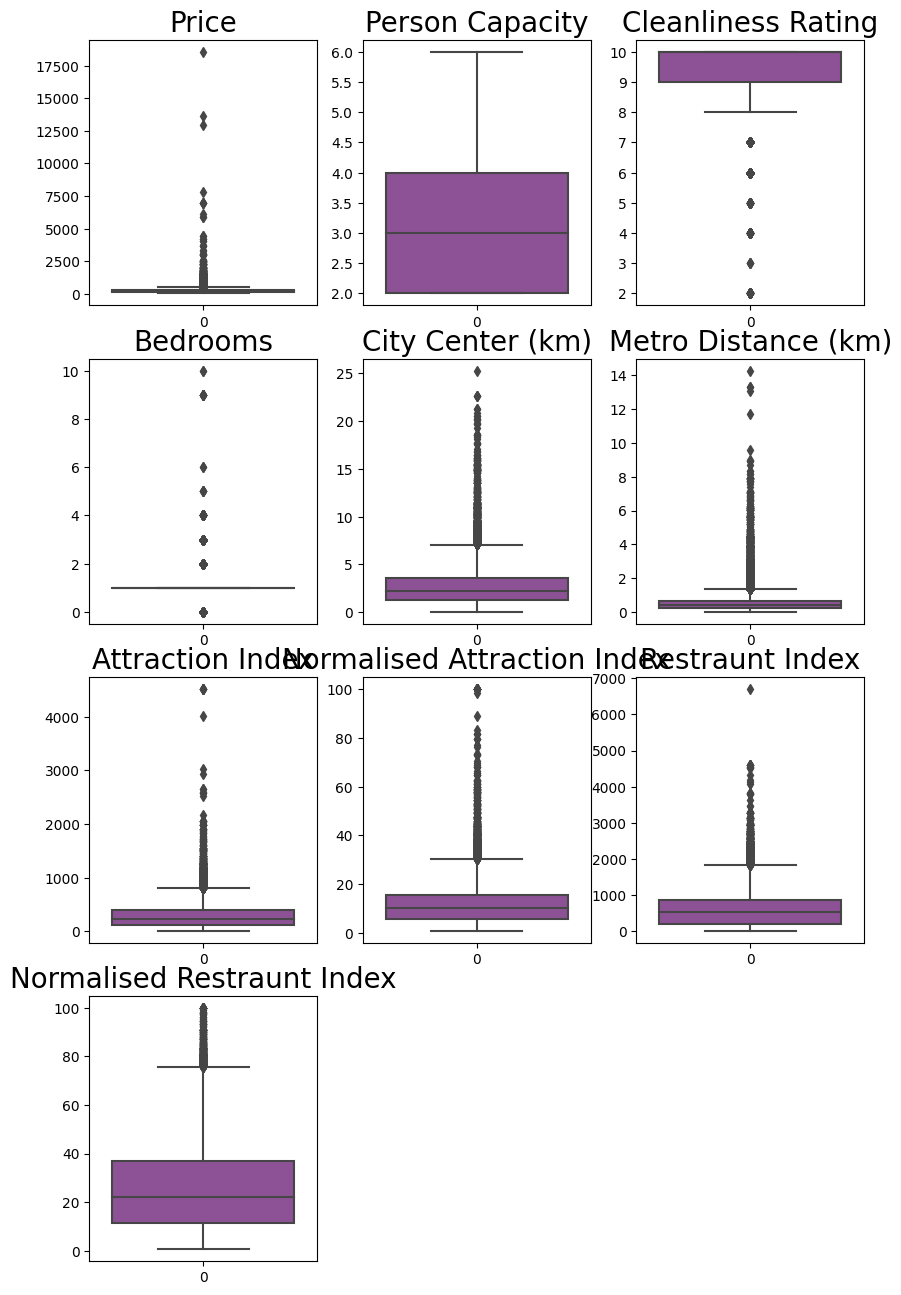

In [ ]:
plot_box(airbnb_train[numeric_columns],numeric_columns,airbnb_train[numeric_columns].shape[1])

# **Feature engineering**

some feature engineering with high corr features for train and test data


In [ ]:

airbnb_train['Cleanliness for Business']=airbnb_train['Cleanliness Rating']*airbnb_train['Business']
airbnb_train['Cleanliness for bedrooms']=airbnb_train['Cleanliness Rating']*airbnb_train['Bedrooms']




airbnb_test['Cleanliness for Business']=airbnb_test['Cleanliness Rating']*airbnb_test['Business']
airbnb_test['Cleanliness for bedrooms']=airbnb_test['Cleanliness Rating']*airbnb_test['Bedrooms']


In [ ]:
corr_matrix=airbnb_train.corr()
corr_matrix['Guest Satisfaction'].sort_values(ascending=False)

<ipython-input-34-993ec08d94ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=airbnb_train.corr()


Guest Satisfaction             1.000000
Cleanliness Rating             0.688522
Superhost                      0.290794
Cleanliness for bedrooms       0.157577
Bedrooms                       0.043495
Multiple Rooms                 0.035767
City Center (km)               0.030286
Metro Distance (km)            0.021909
Person Capacity                0.016997
Price                          0.015187
Normalised Attraction Index   -0.020962
Shared Room                   -0.037619
Attraction Index              -0.046912
Normalised Restraunt Index    -0.047218
Private Room                  -0.050200
Restraunt Index               -0.072372
Cleanliness for Business      -0.119999
Business                      -0.176538
Name: Guest Satisfaction, dtype: float64

update numreic colums after feature engineering 

In [ ]:


numeric_columns=['Price','Person Capacity','Cleanliness Rating','Bedrooms','City Center (km)',
                      'Metro Distance (km)','Attraction Index','Normalised Attraction Index','Restraunt Index','Normalised Restraunt Index'
                      ,'Cleanliness for Business','Cleanliness for bedrooms']

# **Clean Outliers(Not used)**

Not used because data has a lot of outliers and for example the data doesn't contains special events that affect the prices

In [ ]:
for key in airbnb_train[numeric_columns].keys():
    mean=airbnb_train[key].mean()
    median=airbnb_train[key].median()
    mode=airbnb_train[key].mode()[0]

    q25 = airbnb_train[key].quantile(0.25)
    q75 = airbnb_train[key].quantile(0.75)
    intr_qr = q75 - q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    airbnb_train=clean_outliers(airbnb_train,key,mean,median,mode,min,max,method=4)
    airbnb_test=clean_outliers(airbnb_test,key,mean,median,mode,min,max,method=4)



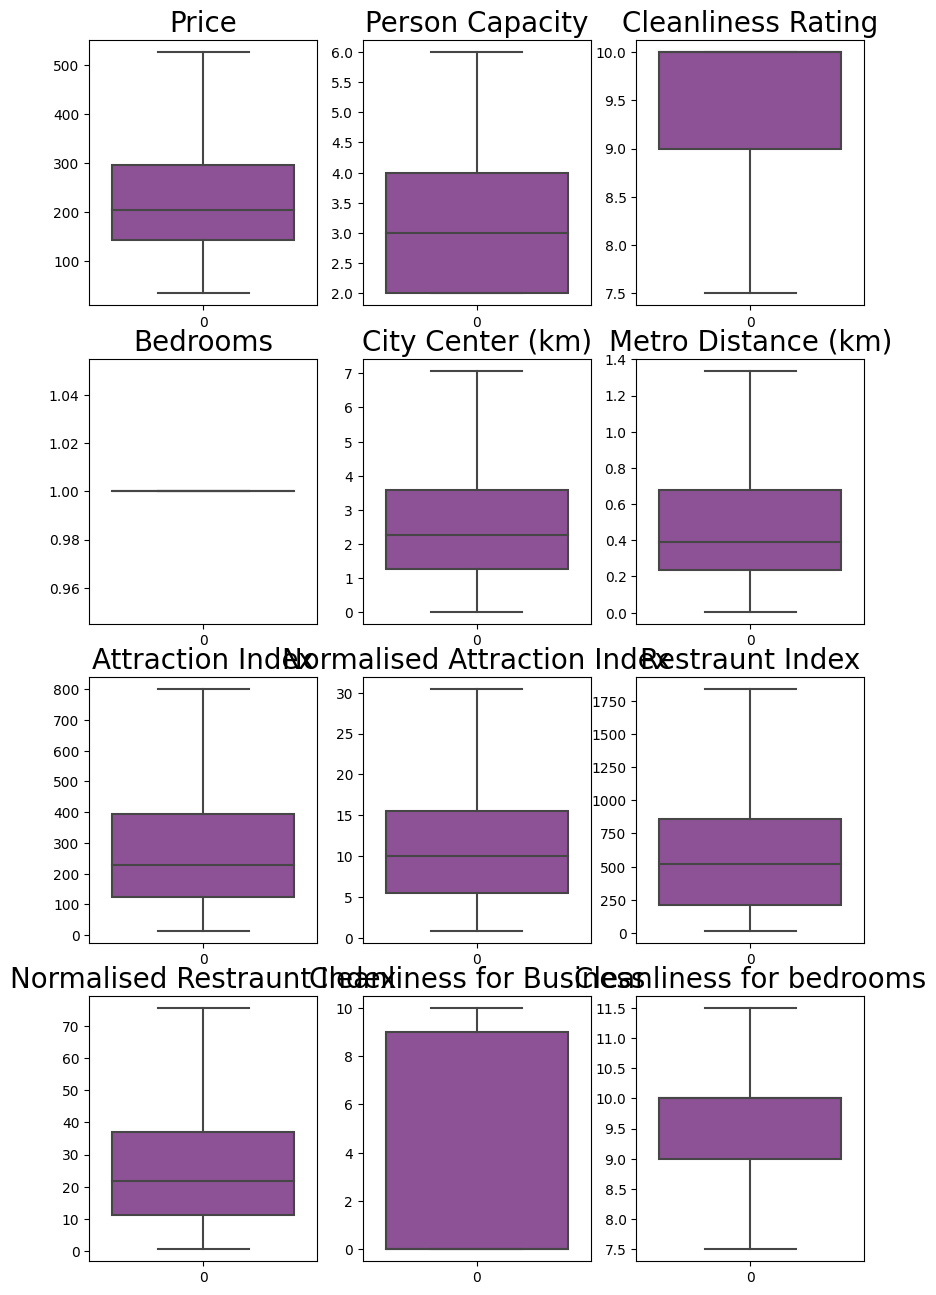

In [ ]:
plot_box(airbnb_train[numeric_columns],numeric_columns,airbnb_train[numeric_columns].shape[1])

# **Data preparation**

convert the  label

In [ ]:
y_train=get_labels(airbnb_train,'Guest Satisfaction')
y_test=get_labels(airbnb_test,'Guest Satisfaction')


Drop the label

In [ ]:
X_train=airbnb_train.drop('Guest Satisfaction',axis=1)
X_test=airbnb_test.drop('Guest Satisfaction',axis=1)


prepare the data for machine learning models

In [ ]:
scaler=StandardScaler()
X_train=data_preparation(X_train,numeric_columns,cat_columns,tf_columns,scaler,False)
X_test=data_preparation(X_test,numeric_columns,cat_columns,tf_columns,scaler,True) 


# **Model selection**

base model to check the data is working

In [ ]:
tree=DecisionTreeClassifier(random_state=3)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
y_pred_train=tree.predict(X_train)

print('train accuracy',accuracy_score(y_train,y_pred_train))



train accuracy 1.0


# **Cross Validation**

test nueral network with differnt archs(at the final of cell) its just normal validation

In [ ]:
X_train_nn,X_val,y_train_nn,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42)
with tf.device('/device:CPU:0'):
  model=tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu',input_shape=(31,)),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(4,activation='softmax'),
    ])

  valid_set=[X_val,y_val]
  model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='SparseCategoricalCrossentropy',
        metrics=['accuracy']
    )

  model.fit(X_train_nn,y_train_nn,validation_data=valid_set,batch_size=1024,epochs=100,shuffle=True)

  y_pred=model.predict(X_val)

  y_pred_train=model.predict(X_train_nn)


  print('val accuracy',accuracy_score(y_val,y_pred.argmax(axis=1)))
  print('train accuracy',accuracy_score(y_train_nn,y_pred_train.argmax(axis=1)))

#val accuracy 0.9285 3 hidden Dense layers with all 16 nuerons

hi
Epoch 1/100
27/27 [==============================] - 3s 13ms/step - loss: 1.6570 - accuracy: 0.3589 - val_loss: 1.2084 - val_accuracy: 0.7515
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 1.3416 - accuracy: 0.4562 - val_loss: 1.0759 - val_accuracy: 0.8581
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 1.1504 - accuracy: 0.6210 - val_loss: 0.9370 - val_accuracy: 0.9043
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.9903 - accuracy: 0.7717 - val_loss: 0.7904 - val_accuracy: 0.9199
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.8385 - accuracy: 0.8597 - val_loss: 0.6522 - val_accuracy: 0.9245
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.8991 - val_loss: 0.5390 - val_accuracy: 0.9254
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5767 - accuracy: 0.9123 - val_loss: 0.4548 - val_accuracy: 0.9255
Epoch 8/1

In [ ]:

X_train_nn,X_val,y_train_nn,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42)
with tf.device('/device:CPU:0'):
  model=tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu',input_shape=(31,)),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(4,activation='softmax'),
    ])
  valid_set=[X_val,y_val]
  model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='SparseCategoricalCrossentropy',
        metrics=['accuracy']
    )

  model.fit(X_train_nn,y_train_nn,validation_data=valid_set,batch_size=1024,epochs=100,shuffle=True)

  y_pred=model.predict(X_val)

  y_pred_train=model.predict(X_train_nn)


  print('val accuracy',accuracy_score(y_val,y_pred.argmax(axis=1)))
  print('train accuracy',accuracy_score(y_train_nn,y_pred_train.argmax(axis=1)))

#val accuracy 0.9281 6 hidden Dense layers with all 16 nuerons 

Epoch 1/100
27/27 [==============================] - 2s 15ms/step - loss: 1.2614 - accuracy: 0.7694 - val_loss: 1.0280 - val_accuracy: 0.9240
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.9168 - val_loss: 0.3531 - val_accuracy: 0.9240
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.9168 - val_loss: 0.2907 - val_accuracy: 0.9240
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.9168 - val_loss: 0.2692 - val_accuracy: 0.9240
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.9168 - val_loss: 0.2569 - val_accuracy: 0.9240
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.9168 - val_loss: 0.2495 - val_accuracy: 0.9240
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.9169 - val_loss: 0.2455 - val_accuracy: 0.9239
Epoch 8/100


In [ ]:
X_train_nn,X_val,y_train_nn,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42)
with tf.device('/device:CPU:0'):
  model=tf.keras.Sequential([
        tf.keras.layers.Dense(32,activation='relu',input_shape=(31,)),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(4,activation='softmax'),
    ])
  valid_set=[X_val,y_val]
  model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='SparseCategoricalCrossentropy',
        metrics=['accuracy']
    )

  model.fit(X_train_nn,y_train_nn,validation_data=valid_set,batch_size=1024,epochs=100,shuffle=True)

  y_pred=model.predict(X_val)

  y_pred_train=model.predict(X_train_nn)


  print('val accuracy',accuracy_score(y_val,y_pred.argmax(axis=1)))
  print('train accuracy',accuracy_score(y_train_nn,y_pred_train.argmax(axis=1)))


#val accuracy 0.9308 3 hidden Dense layers with 32,16,8 nuerons

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 1.1767 - accuracy: 0.6171 - val_loss: 0.8828 - val_accuracy: 0.9237
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6752 - accuracy: 0.9167 - val_loss: 0.4541 - val_accuracy: 0.9240
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.9168 - val_loss: 0.3257 - val_accuracy: 0.9240
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.9168 - val_loss: 0.2912 - val_accuracy: 0.9240
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.9170 - val_loss: 0.2717 - val_accuracy: 0.9248
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.9178 - val_loss: 0.2594 - val_accuracy: 0.9254
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.9184 - val_loss: 0.2520 - val_accuracy: 0.9269
Epoch 8/100


In [ ]:
X_train_nn,X_val,y_train_nn,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42)
with tf.device('/device:CPU:0'):
  model=tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu',input_shape=(31,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4,activation='softmax'),
    ])
  valid_set=[X_val,y_val]
  model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='SparseCategoricalCrossentropy',
        metrics=['accuracy']
    )

  model.fit(X_train_nn,y_train_nn,validation_data=valid_set,batch_size=1024,epochs=100,shuffle=True)

  y_pred=model.predict(X_val)

  y_pred_train=model.predict(X_train_nn)


  print('val accuracy',accuracy_score(y_val,y_pred.argmax(axis=1)))
  print('train accuracy',accuracy_score(y_train_nn,y_pred_train.argmax(axis=1)))



#val accuracy 0.9299 3 hidden Dense layers with all 16 nuerons with BatchNormalization between every hidden layer

Epoch 1/100
27/27 [==============================] - 2s 15ms/step - loss: 1.7085 - accuracy: 0.3236 - val_loss: 1.1613 - val_accuracy: 0.7882
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 1.3525 - accuracy: 0.4514 - val_loss: 1.0463 - val_accuracy: 0.8656
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 1.1455 - accuracy: 0.6179 - val_loss: 0.9196 - val_accuracy: 0.9019
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 0.9798 - accuracy: 0.7506 - val_loss: 0.7864 - val_accuracy: 0.9155
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.8281 - accuracy: 0.8404 - val_loss: 0.6524 - val_accuracy: 0.9218
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.8816 - val_loss: 0.5403 - val_accuracy: 0.9234
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.9016 - val_loss: 0.4508 - val_accuracy: 0.9248
Epoch 8/100


cross val for candidate models

In [ ]:
xgb = XGBClassifier(random_state=3)
tree=DecisionTreeClassifier(random_state=3)
nn = MLPClassifier()
#max_iter=200,learning_rate='adaptive',learning_rate_init=0.01,random_state=3
print('DecisionTree',sum(cross_val_score(tree, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)#0.928141193
print('nueral network dense',sum(cross_val_score(nn, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)#0.92727 with no feature engineering
print('xgboost',sum(cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)#0.940726908266076


DecisionTree 0.9281112484132622


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

nueral network dense 0.9277217308152043
xgboost 0.940726908266076


In [ ]:
random_f_clf=RandomForestClassifier(random_state=3)
print('RandomForestClassifier',sum(cross_val_score(random_f_clf, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)#


RandomForestClassifier 0.9415959927226119


In [ ]:
gb=GradientBoostingClassifier()
print('GradientBoostingClassifier',sum(cross_val_score(gb, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)

DecisionTree 0.9276017818601785


In [ ]:
lg=LogisticRegression()
print('Logistic Regression',sum(cross_val_score(lg, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)

DecisionTree 0.9245452294610759


In [ ]:
svm=SVC()
print('Support vector machine',sum(cross_val_score(svm, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)

DecisionTree 0.9254442495277667


# **Grid search cv (hyperparamter tuning)**

Grid search with cross validation with the best 3 candidates models (hyperparamter tuning)

In [ ]:
tree=DecisionTreeClassifier(random_state=3)

parameters = {'max_depth':[24,26,28],'max_leaf_nodes':[200,531,600]}

tree_clf=GridSearchCV(tree,parameters,cv=5,n_jobs=-1,verbose=3)
tree_clf.fit(X_train, y_train)


y_pred_train=tree_clf.predict(X_train)

print('Cross Validation accuracy',tree_clf.best_score_)
print('train accuracy',accuracy_score(y_train,y_pred_train))

y_pred_train=tree_clf.predict_proba(X_train)

print('cross entropy train',log_loss(y_train,y_pred_train))
print(tree_clf.get_params(deep=True))
#best cv 0.933205 {'max_depth': 26, 'max_leaf_nodes': 531, 'min_samples_leaf': 1, 'min_samples_split': 2}

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Cross Validation accuracy 0.9332054470419617
train accuracy 0.9627820562764077
cross entropy train 0.15731185299905345
{'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': -1, 'param_grid': {'max_depth': [25, 26], 'max_leaf_nodes': [531], 'min_samples_leaf': [1], 'min_samples_split': [2]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 3}


In [ ]:

print(tree_clf.best_params_)
tree_clf.best_score_

{'max_depth': 26, 'max_leaf_nodes': 531, 'min_samples_leaf': 1, 'min_samples_split': 2}


0.9332054470419617

In [ ]:

xgb = XGBClassifier(random_state=3,n_jobs=-1,tree_method='gpu_hist',gpu_id=0)

parameters = {'eta':[0.04,0.2], 'max_depth':[20,30,110],'reg_lambda':[4],'n_estimators':[200,1000]}

tree_clf=GridSearchCV(xgb,parameters,cv=5,n_jobs=-1,verbose=3,pre_dispatch=10000)
tree_clf.fit(X_train, y_train)


y_pred_train=tree_clf.predict(X_train)

print('Cross Validation accuracy',tree_clf.best_score_)
print('train accuracy',accuracy_score(y_train,y_pred_train))
y_pred_train=tree_clf.predict_proba(X_train)

print('cross entropy train',log_loss(y_train,y_pred_train))

# best cv  0.9534 {'eta': 0.04, 'max_depth': 19, 'n_estimators': 300, 'reg_lambda': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Cross Validation accuracy 0.9534326084004224
train accuracy 0.9994306433729885
cross entropy train 0.004817077907947438


In [ ]:
print(tree_clf.best_params_)
tree_clf.best_score_

In [ ]:
random_f_clf=RandomForestClassifier(random_state=3,max_depth=30,n_estimators=300)

parameters = {'max_depth':[20,26,30],'n_estimators':[300]}

tree_clf=GridSearchCV(random_f_clf,parameters,cv=5,n_jobs=-1,verbose=3,pre_dispatch=10000)
tree_clf.fit(X_train, y_train)


y_pred_train=tree_clf.predict(X_train)

print('Cross Validation accuracy',tree_clf.best_score_)
print('train accuracy',accuracy_score(y_train,y_pred_train))
y_pred_train=tree_clf.predict_proba(X_train)

print('cross entropy train',log_loss(y_train,y_pred_train))

# best cv  0.9420 {'max_depth': 26, 'max_features': 'sqrt', 'n_estimators': 300}

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Cross Validation accuracy 0.9420155312302535
train accuracy 1.0
cross entropy train 0.03832828107257421


In [ ]:
print(tree_clf.best_params_)
tree_clf.best_score_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}


0.9420155312302535

Taking the 3 models after hyperparametrs tuning into votiong and stacking classifier

In [ ]:
xgb = XGBClassifier(random_state=3,eta=0.04, max_depth=110,reg_lambda=4,n_estimators=1000)
random_f_clf=RandomForestClassifier(random_state=3,max_depth=30,n_estimators=300)
tree=DecisionTreeClassifier(random_state=3,max_depth=26,max_leaf_nodes=531)


vclf=VotingClassifier(estimators=[
          ('XGB', xgb),('random_f_clf',random_f_clf),('tree',tree)], voting='soft')


print('VotingClassifier',sum(cross_val_score(vclf, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)

#best cv 0.94318

VotingClassifier 0.9431841917710744


In [ ]:
xgb = XGBClassifier(random_state=3,eta=0.04, max_depth=110,reg_lambda=4,n_estimators=1000)
random_f_clf=RandomForestClassifier(random_state=3,max_depth=30,n_estimators=300)
tree=DecisionTreeClassifier(random_state=3,max_depth=26,max_leaf_nodes=531)


vclf=VotingClassifier(estimators=[
          ('XGB', xgb),('random_f_clf',random_f_clf),('tree',tree)], voting='hard')


print('VotingClassifier',sum(cross_val_score(vclf, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)
#best cv 0.9444

VotingClassifier 0.944472751883041


In [ ]:
xgb = XGBClassifier(random_state=3,eta=0.04, max_depth=110,reg_lambda=4,n_estimators=1000)
random_f_clf=RandomForestClassifier(random_state=3,max_depth=30,n_estimators=300)
tree=DecisionTreeClassifier(random_state=3,max_depth=26,max_leaf_nodes=531)


estimators = [
     ('random_f_clf',random_f_clf),('tree',tree)]
stack_clf=StackingClassifier(
    estimators=estimators,final_estimator=xgb
)
print('StackingClassifier',sum(cross_val_score(stack_clf, X_train, y_train.values.ravel(), cv=5, scoring="accuracy"))/5)
#best cv 0.9417

StackingClassifier 0.9417157845471106


# **Report test result**

report the best model with test data

In [ ]:
xgb = XGBClassifier(random_state=3,eta=0.04, max_depth=110,reg_lambda=4,n_estimators=1000)

xgb.fit(X_train,y_train)

y_pred_test=xgb.predict(X_test)

print('test accuracy',accuracy_score(y_test,y_pred_test))

test accuracy 0.9627232410403932


take two random examples from the test labels

In [80]:
y_test_array=np.zeros(2)
y_test_array[0]=y_test.to_numpy()[0]
y_test_array[1]=y_test.to_numpy()[1000]
y_test_array

array([3., 0.])

get the true labels for the two random examples from the test labels

In [81]:
get_true_label(y_test_array)

['very satisfied', 'unsatisfied']

take the same two random examples from the test predctions

In [83]:
y_pred_test[[0,1000]]

array([3, 0])

get the true labels for predections  for the two rows in the test data

In [84]:
get_true_label(y_pred_test[[0,1000]])

['very satisfied', 'unsatisfied']